# CODE TO CLASSIFY IMAGES (CIFAR-10) USING CNNs

## PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
    - Airplanes
    - Cars
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications.
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32).
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

# IMPORT LIBRARIES/DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10


In [3]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

# VISUALIZE DATA

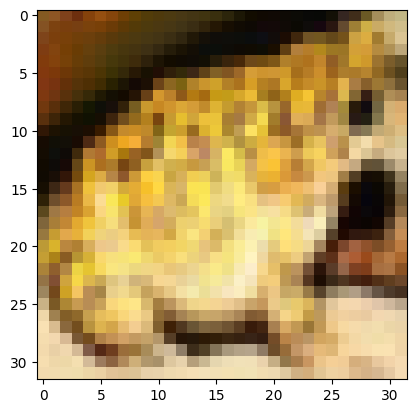

In [8]:
i = 30011  # random index
plt.imshow(X_train[i])

In [9]:
print(y_train[i])

[6]


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


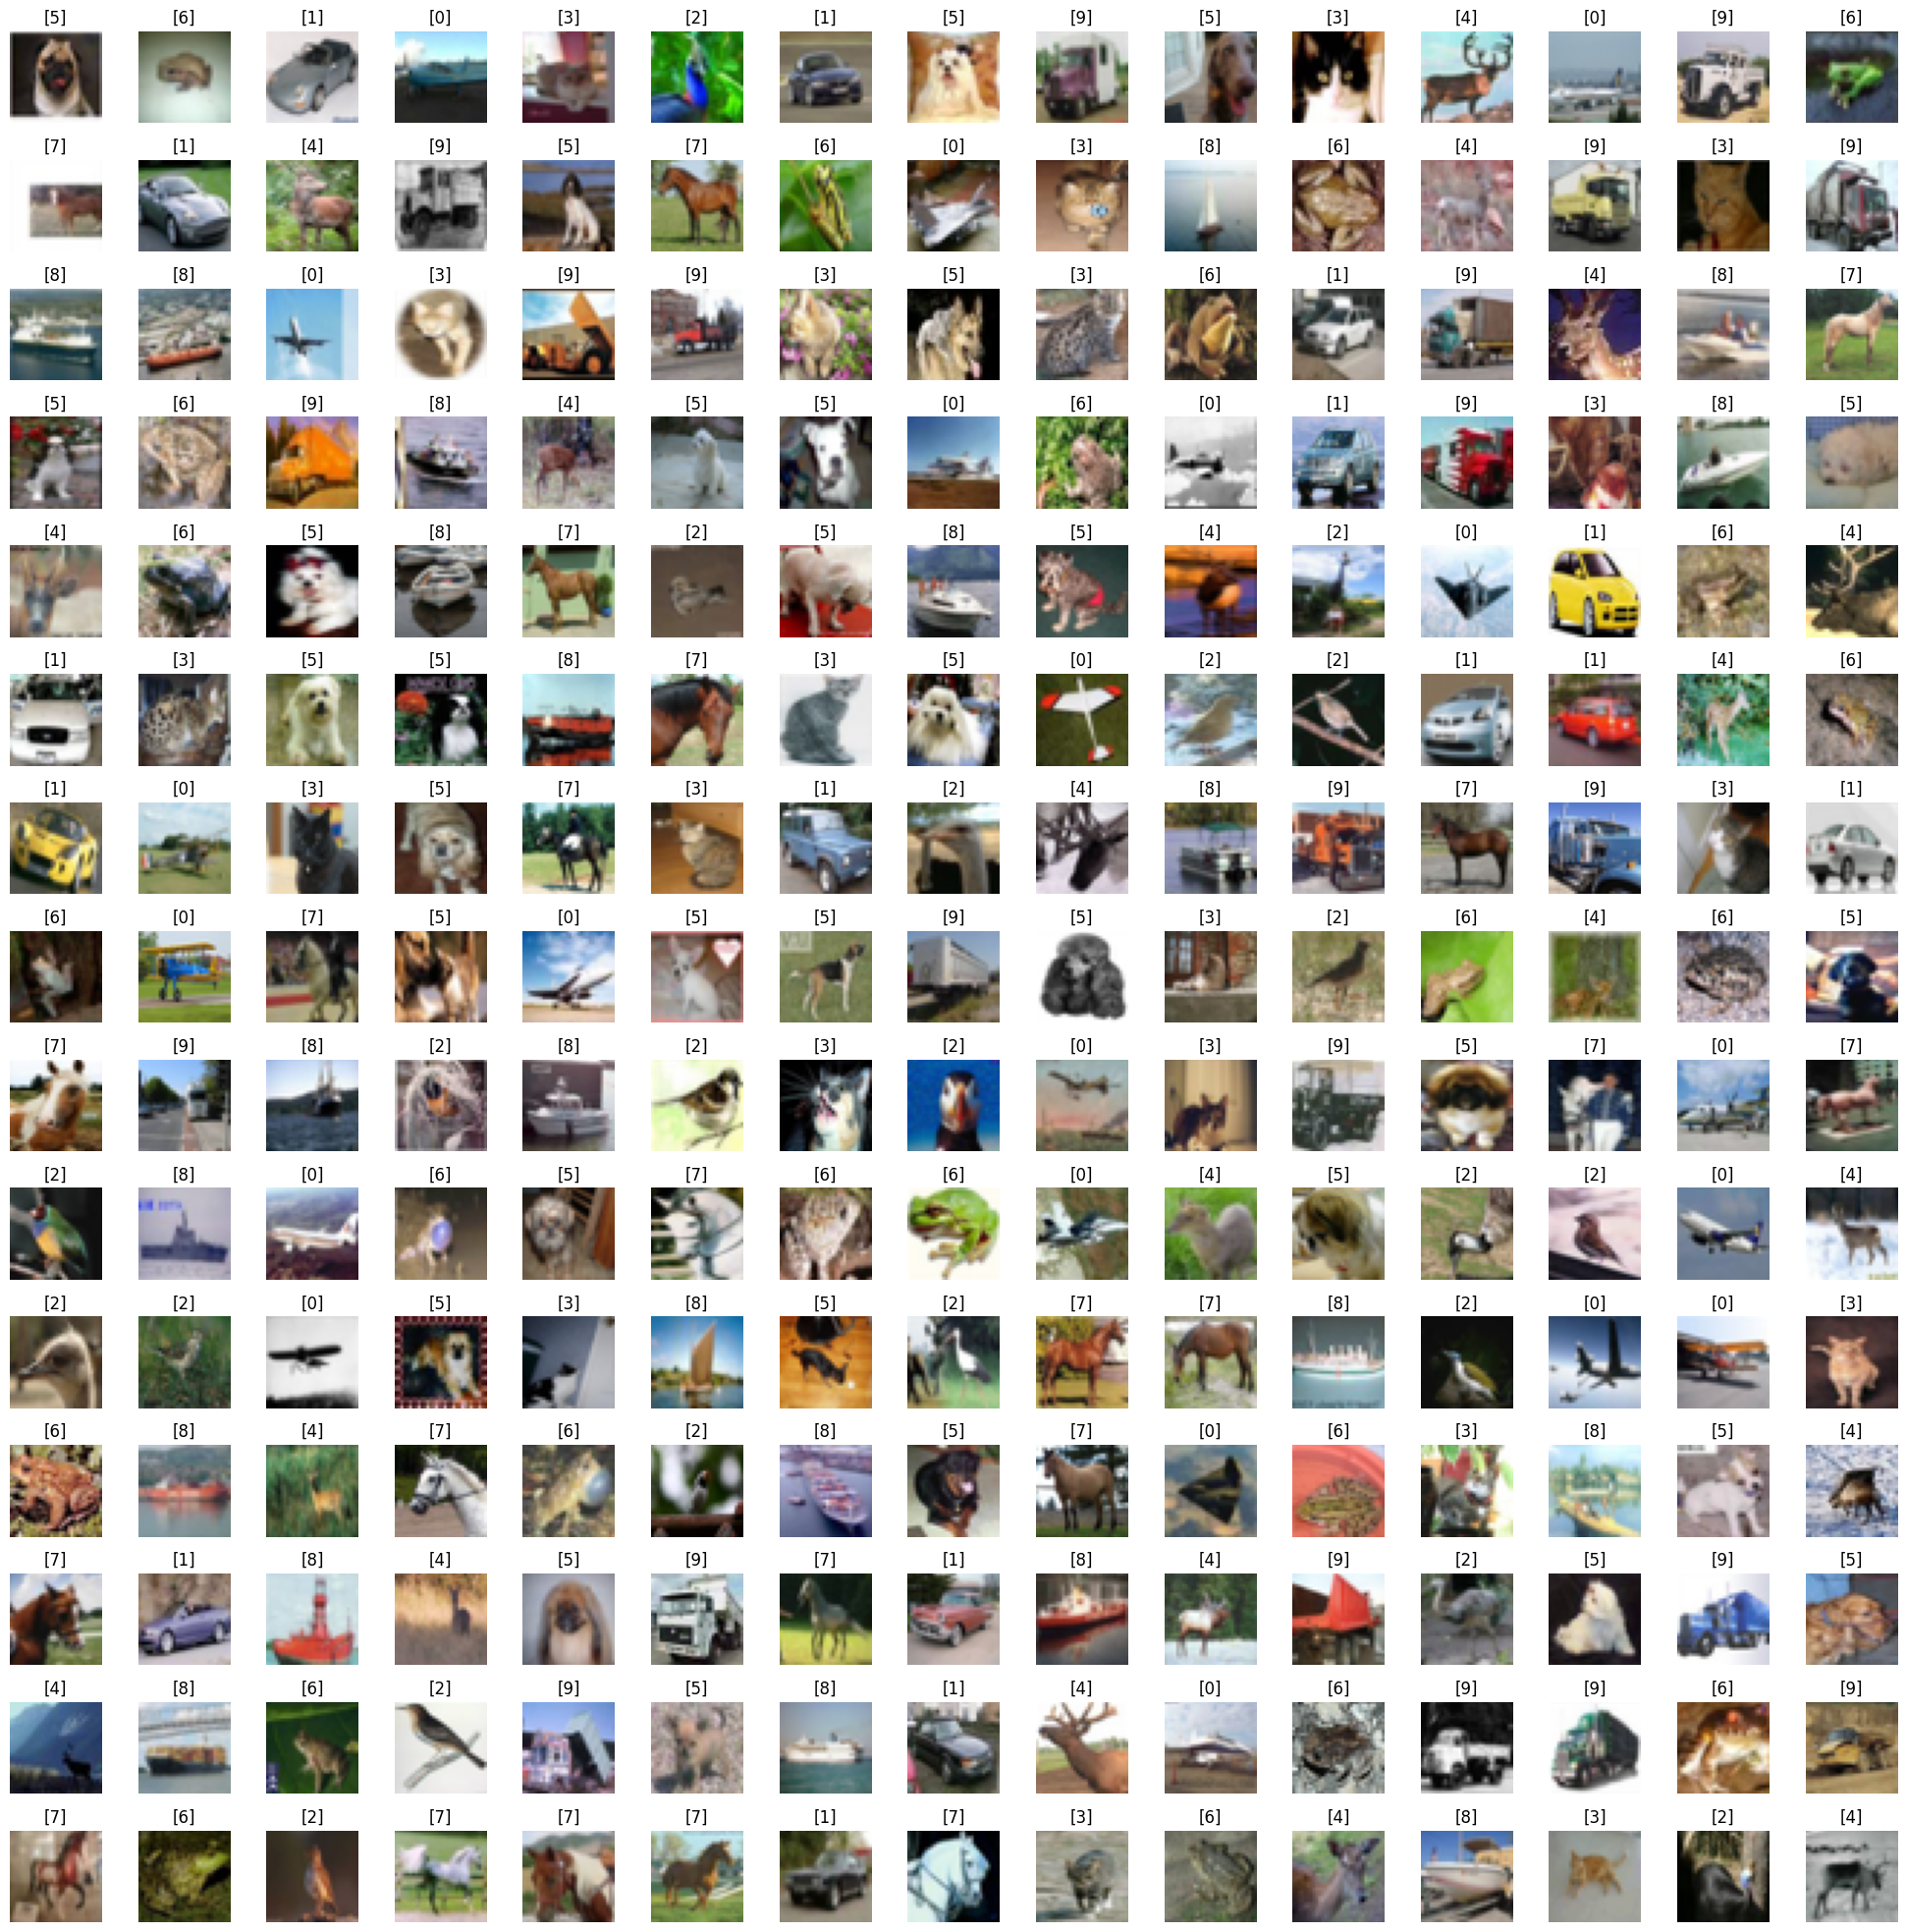

In [10]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid * W_grid):
  index = np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [11]:
n_training

50000

# DATA PREPARATION

converting image into float 32


In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

how many classes are there

In [13]:
number_cat = 10

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

converting this into binary system

In [15]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [19]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

normalising the pixels

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
Input_shape = X_train.shape[1:]

In [24]:
Input_shape # shape of the image

(32, 32, 3)

# TRAIN THE MODEL

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [26]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [27]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)

1563/1563 [==============================] - 724s 462ms/step - loss: 1.5895 - accuracy: 0.4312


#  EVALUATE THE MODEL

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

In [30]:
predicted_classes = cnn_model.predict(X_test)
predicted_classes

313/313 [==============================] - 31s 95ms/step


array([[5.99466264e-03, 1.90380123e-03, 8.42136294e-02, ...,
        8.16767476e-03, 4.11475785e-02, 4.48151911e-03],
       [8.90354291e-02, 5.93702435e-01, 3.54270189e-04, ...,
        7.27871429e-06, 2.89195806e-01, 2.74651367e-02],
       [1.20027140e-01, 2.22694516e-01, 4.64241132e-02, ...,
        3.06809898e-02, 3.14960361e-01, 1.41758010e-01],
       ...,
       [1.07139302e-03, 1.11004185e-04, 9.61977839e-02, ...,
        7.53950104e-02, 9.62559017e-04, 4.54950525e-04],
       [1.13603368e-01, 2.41585970e-02, 1.10962167e-01, ...,
        6.95173144e-02, 3.02855321e-03, 5.12427837e-03],
       [1.00484817e-06, 2.12523665e-09, 8.45579325e-06, ...,
        9.91753042e-01, 5.23773358e-10, 3.28935457e-08]], dtype=float32)

In [31]:
predicted_classes =np.argmax(predicted_classes ,axis=1)

In [32]:
predicted_classes

array([3, 1, 8, ..., 5, 4, 7])

In [33]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [34]:
y_test = y_test.argmax(1)

In [35]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

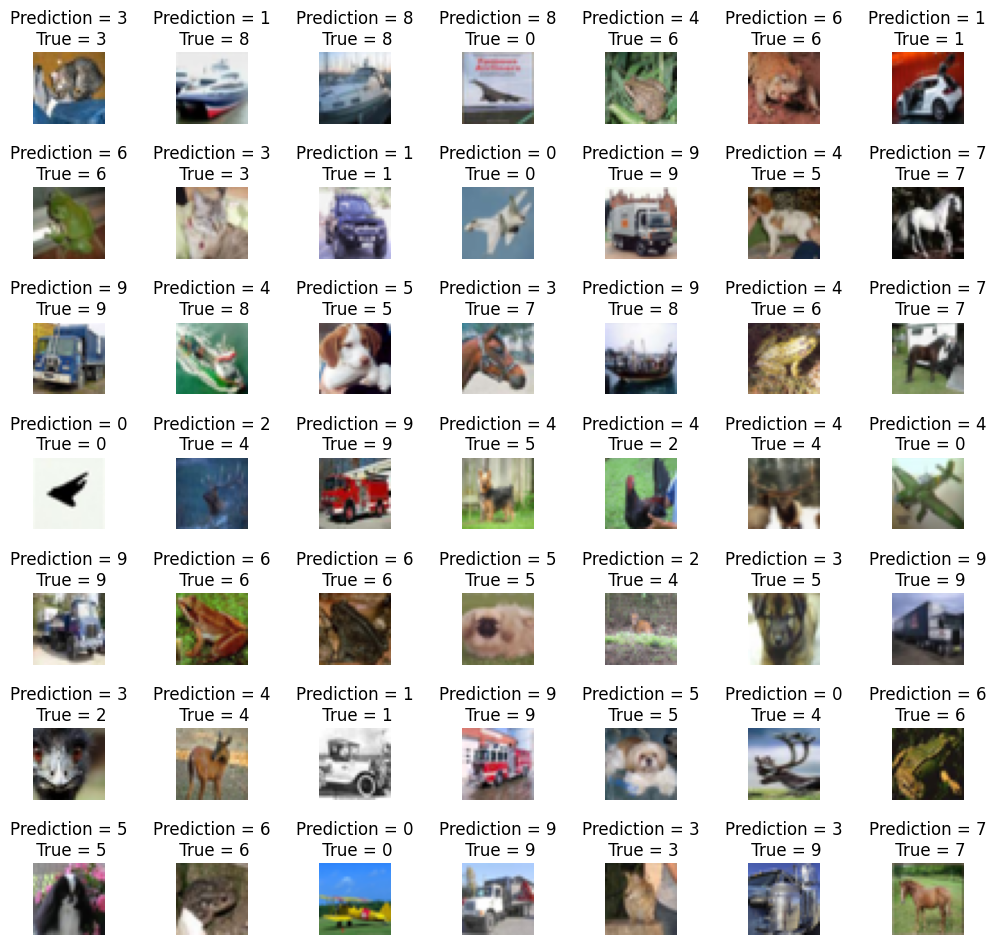

In [36]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

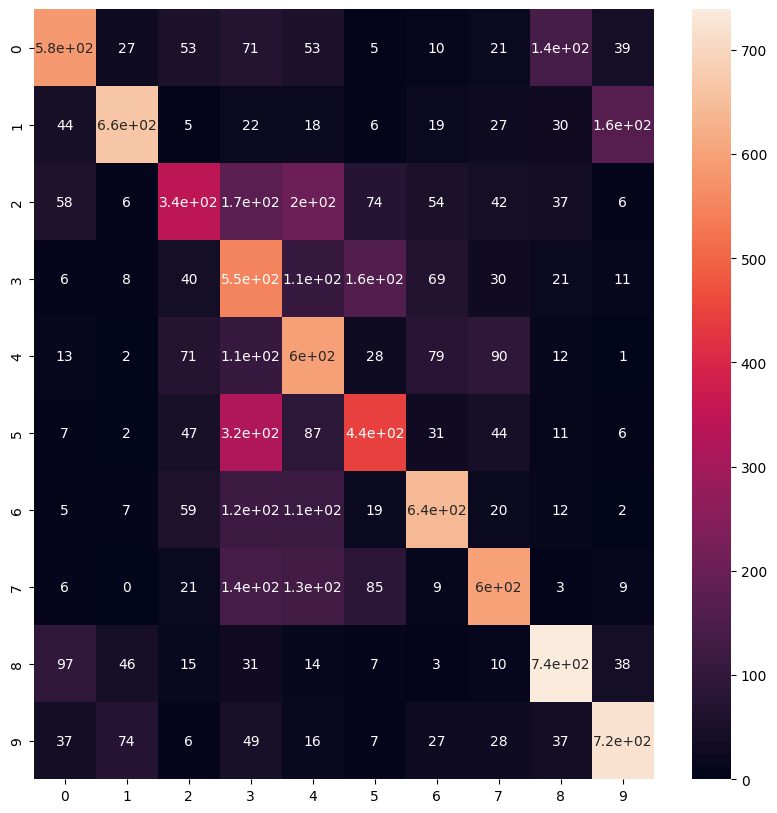

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [38]:
cm

array([[584,  27,  53,  71,  53,   5,  10,  21, 137,  39],
       [ 44, 664,   5,  22,  18,   6,  19,  27,  30, 165],
       [ 58,   6, 345, 174, 204,  74,  54,  42,  37,   6],
       [  6,   8,  40, 551, 108, 156,  69,  30,  21,  11],
       [ 13,   2,  71, 107, 597,  28,  79,  90,  12,   1],
       [  7,   2,  47, 320,  87, 445,  31,  44,  11,   6],
       [  5,   7,  59, 119, 114,  19, 643,  20,  12,   2],
       [  6,   0,  21, 138, 130,  85,   9, 599,   3,   9],
       [ 97,  46,  15,  31,  14,   7,   3,  10, 739,  38],
       [ 37,  74,   6,  49,  16,   7,  27,  28,  37, 719]])

# SAVING THE MODEL

In [39]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):  # if there is no directory then create it
    os.makedirs(directory)

model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

#  IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images.
- Augmentations also include shifting and changing the brightness of the images.

In [40]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [41]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [42]:
X_train.shape

(50000, 32, 32, 3)

In [43]:
n = 8           # 8 images
X_train_sample = X_train[:n]

In [44]:
X_train_sample.shape

(8, 32, 32, 3)

In [45]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

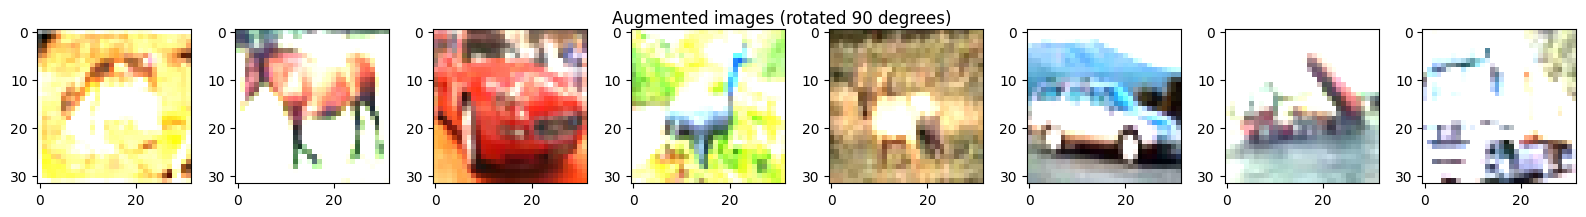

In [46]:
from PIL import Image

fig = plt.figure(figsize = (20,2))

for x_batch in dataget_train.flow(X_train_sample, batch_size = n):

     for i in range(0,n):

            ax = fig.add_subplot(1, n, i+1)

            ax.imshow(Image.fromarray(np.uint8(x_batch[i])))

     fig.suptitle('Augmented images (rotated 90 degrees)')

     plt.show()

     break;

# MODEL TRAINING USING AUGEMENTED DATASET

In [47]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [48]:
datagen.fit(X_train)

In [49]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/2


<ipython-input-49-7c51626cc5e7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)


1563/1563 [==============================] - 675s 431ms/step - loss: 5200791704206049280.0000 - accuracy: 0.1572
Epoch 2/2
1563/1563 [==============================] - 673s 431ms/step - loss: 7107033181611437850624.0000 - accuracy: 0.0038


In [50]:
X_test.shape

(10000, 32, 32, 3)

In [51]:
y_test.shape

(10000, 1)

In [52]:
y_train.shape

(50000, 1)

In [53]:
X_train.shape

(50000, 32, 32, 3)

In [55]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)